In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.stats as stats
#import lightgbm as lgb
% matplotlib inline
pd.options.display.max_columns = 999


In [41]:
train_data = pd.read_csv('data/train_2016_v2.csv', parse_dates =["transactiondate"])
print(train_data.shape)
print(train_data.head(10))

(90275, 3)
   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02
5  11509835   -0.2705      2016-01-02
6  12286022    0.0440      2016-01-02
7  17177301    0.1638      2016-01-02
8  14739064   -0.0030      2016-01-02
9  14677559    0.0843      2016-01-03


In [42]:
property_data = pd.read_csv('data/2016DATA.csv')
print(property_data.shape)
print(property_data.head(10))

(90275, 58)
   parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  12027388                    1.0                       NaN           NaN   
1  12029288                    1.0                       NaN           NaN   
2  12035796                    NaN                       NaN           NaN   
3  12037477                    NaN                       NaN           NaN   
4  12062316                    1.0                       NaN           NaN   
5  17073783                    NaN                       NaN           NaN   
6  17088994                    NaN                       NaN           NaN   
7  17100444                    NaN                       NaN           NaN   
8  17102429                    NaN                       NaN           NaN   
9  17109604                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          4.0           4                  NaN        

In [43]:
print(property_data.dtypes)

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                        int64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                              int64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                          int64


Text(0.5,1,'Percentage of Present Information by Feature')

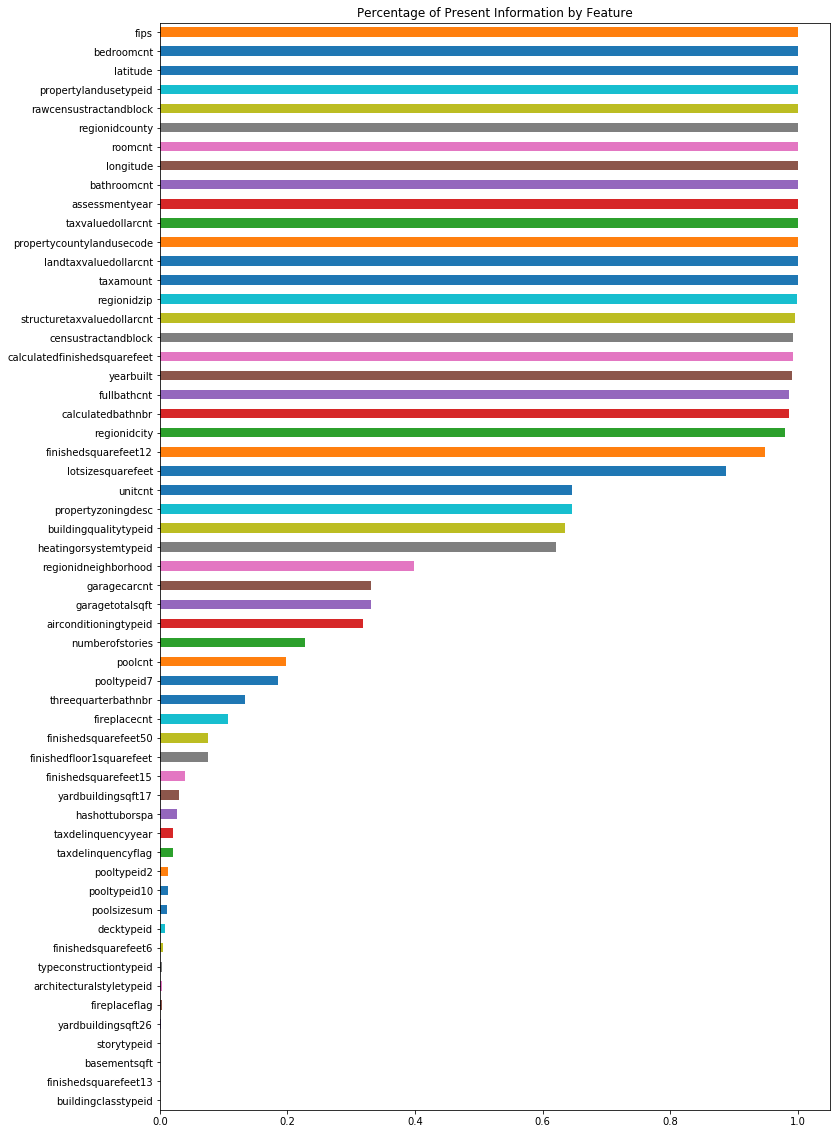

In [44]:
plt.figure(figsize=(12,20))
property_data.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Percentage of Present Information by Feature')

In [45]:
property_data.notnull().mean().sort_values(ascending = False)

parcelid                        1.000000
roomcnt                         1.000000
regionidcounty                  1.000000
rawcensustractandblock          1.000000
propertylandusetypeid           1.000000
longitude                       1.000000
latitude                        1.000000
fips                            1.000000
bedroomcnt                      1.000000
assessmentyear                  1.000000
bathroomcnt                     1.000000
taxvaluedollarcnt               0.999989
propertycountylandusecode       0.999989
landtaxvaluedollarcnt           0.999989
taxamount                       0.999934
regionidzip                     0.999612
structuretaxvaluedollarcnt      0.995791
censustractandblock             0.993154
calculatedfinishedsquarefeet    0.992678
yearbuilt                       0.991626
calculatedbathnbr               0.986907
fullbathcnt                     0.986907
regionidcity                    0.980028
finishedsquarefeet12            0.948169
lotsizesquarefee

In [46]:
property_data.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = False)

fips                            1.000000
bedroomcnt                      1.000000
latitude                        1.000000
propertylandusetypeid           1.000000
rawcensustractandblock          1.000000
regionidcounty                  1.000000
roomcnt                         1.000000
longitude                       1.000000
bathroomcnt                     1.000000
assessmentyear                  1.000000
taxvaluedollarcnt               0.999989
propertycountylandusecode       0.999989
landtaxvaluedollarcnt           0.999989
taxamount                       0.999934
regionidzip                     0.999612
structuretaxvaluedollarcnt      0.995791
censustractandblock             0.993154
calculatedfinishedsquarefeet    0.992678
yearbuilt                       0.991626
fullbathcnt                     0.986907
calculatedbathnbr               0.986907
regionidcity                    0.980028
finishedsquarefeet12            0.948169
lotsizesquarefeet               0.887566
unitcnt         

In [47]:
#CLEAN UP POOL DATA
# "0 pools"
property_data.poolcnt.fillna(0,inplace = True)

# "0 hot tubs or spas"
property_data.hashottuborspa.fillna(0,inplace = True)

# Convert "True" to 1
property_data.hashottuborspa.replace(to_replace = True, value = 1,inplace = True)

# Set properties that have a pool but no info on poolsize equal to the median poolsize value.
property_data.loc[property_data.poolcnt==1, 'poolsizesum'] = property_data.loc[property_data.poolcnt==1, 'poolsizesum'].fillna(property_data[property_data.poolcnt==1].poolsizesum.median())

# "0 pools" = "0 sq ft of pools"
property_data.loc[property_data.poolcnt==0, 'poolsizesum']=0

# "0 pools with a spa/hot tub"
property_data.pooltypeid2.fillna(0,inplace = True)

# "0 pools without a hot tub"
property_data.pooltypeid7.fillna(0,inplace = True)

# Drop redundant feature
property_data.drop('pooltypeid10', axis=1, inplace=True)



In [48]:
property_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,12027388,1.0,NaN,NaN,4.0,4,NaN,10.0,4.0,NaN,NaN,2656.0,2656.0,NaN,NaN,NaN,NaN,6037,NaN,4.0,NaN,NaN,0,2.0,34106496,-118354986,5388.0,0.0,0.0,0.0,0.0,100,261,LARE15,60371941.01,12447.0,3101,274049.0,96027.0,0,NaN,NaN,NaN,1.0,NaN,NaN,2002.0,NaN,NaN,451905.0,1415975.0,2015,964070.0,17285.85,NaN,NaN,6.037190e+13
1,12029288,1.0,NaN,NaN,2.0,2,NaN,4.0,2.0,NaN,NaN,1032.0,1032.0,NaN,NaN,NaN,NaN,6037,NaN,2.0,NaN,NaN,0,2.0,34118200,-118336000,598159.0,1.0,500.0,0.0,1.0,010C,266,LARE15,60371897.01,12447.0,3101,274049.0,96049.0,0,NaN,NaN,NaN,1.0,NaN,NaN,1975.0,NaN,NaN,116766.0,190511.0,2015,73745.0,2475.17,NaN,NaN,6.037190e+13
2,12035796,NaN,NaN,NaN,2.0,3,NaN,4.0,2.0,NaN,NaN,2125.0,2125.0,NaN,NaN,NaN,NaN,6037,NaN,2.0,NaN,NaN,0,2.0,34108683,-118295659,5411.0,0.0,0.0,0.0,0.0,100,261,LAR1,60371892.02,12447.0,3101,274359.0,96008.0,0,NaN,NaN,NaN,1.0,NaN,NaN,1933.0,NaN,NaN,260094.0,1315773.0,2015,1055679.0,16160.72,NaN,NaN,6.037190e+13
3,12037477,NaN,NaN,NaN,2.0,3,NaN,7.0,2.0,NaN,NaN,1650.0,1650.0,NaN,NaN,NaN,NaN,6037,NaN,2.0,NaN,NaN,0,2.0,34107831,-118284064,4499.0,0.0,0.0,0.0,0.0,100,261,LAR2,60371952.01,12447.0,3101,274359.0,96008.0,0,NaN,NaN,NaN,1.0,NaN,NaN,1918.0,NaN,NaN,138580.0,692902.0,2015,554322.0,8438.09,NaN,NaN,6.037200e+13
4,12062316,1.0,NaN,NaN,2.0,3,NaN,4.0,2.0,NaN,NaN,1408.0,1408.0,NaN,NaN,NaN,NaN,6037,NaN,2.0,NaN,NaN,0,2.0,34150100,-118261000,19842.0,0.0,0.0,0.0,0.0,010E,266,GLR4*,60373018.02,45457.0,3101,275884.0,96322.0,0,NaN,NaN,NaN,1.0,NaN,NaN,1979.0,NaN,NaN,149469.0,331083.0,2015,181614.0,3728.50,NaN,NaN,6.037300e+13


In [50]:
print(property_data.shape)
property_data.notnull().mean().sort_values(ascending = False)

(90275, 57)


poolsizesum                     1.000000
roomcnt                         1.000000
bathroomcnt                     1.000000
bedroomcnt                      1.000000
fips                            1.000000
hashottuborspa                  1.000000
latitude                        1.000000
longitude                       1.000000
poolcnt                         1.000000
pooltypeid2                     1.000000
pooltypeid7                     1.000000
propertylandusetypeid           1.000000
rawcensustractandblock          1.000000
regionidcounty                  1.000000
parcelid                        1.000000
assessmentyear                  1.000000
landtaxvaluedollarcnt           0.999989
taxvaluedollarcnt               0.999989
propertycountylandusecode       0.999989
taxamount                       0.999934
regionidzip                     0.999612
structuretaxvaluedollarcnt      0.995791
censustractandblock             0.993154
calculatedfinishedsquarefeet    0.992678
yearbuilt       

In [51]:
#CLEANING UP TRAIN DATA

train_with_months = train_data

train_with_months['sale_month'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).month)
train_with_months['sale_day'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).day)
train_with_months['sale_year'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).year)

train_with_months.head(10)

,parcelid,logerror,transactiondate,sale_month,sale_day,sale_year
0,11016594,0.0276,2016-01-01,1,1,2016
1,14366692,-0.1684,2016-01-01,1,1,2016
2,12098116,-0.0040,2016-01-01,1,1,2016
3,12643413,0.0218,2016-01-02,1,2,2016
4,14432541,-0.0050,2016-01-02,1,2,2016
5,11509835,-0.2705,2016-01-02,1,2,2016
6,12286022,0.0440,2016-01-02,1,2,2016
7,17177301,0.1638,2016-01-02,1,2,2016
8,14739064,-0.0030,2016-01-02,1,2,2016
9,14677559,0.0843,2016-01-03,1,3,2016


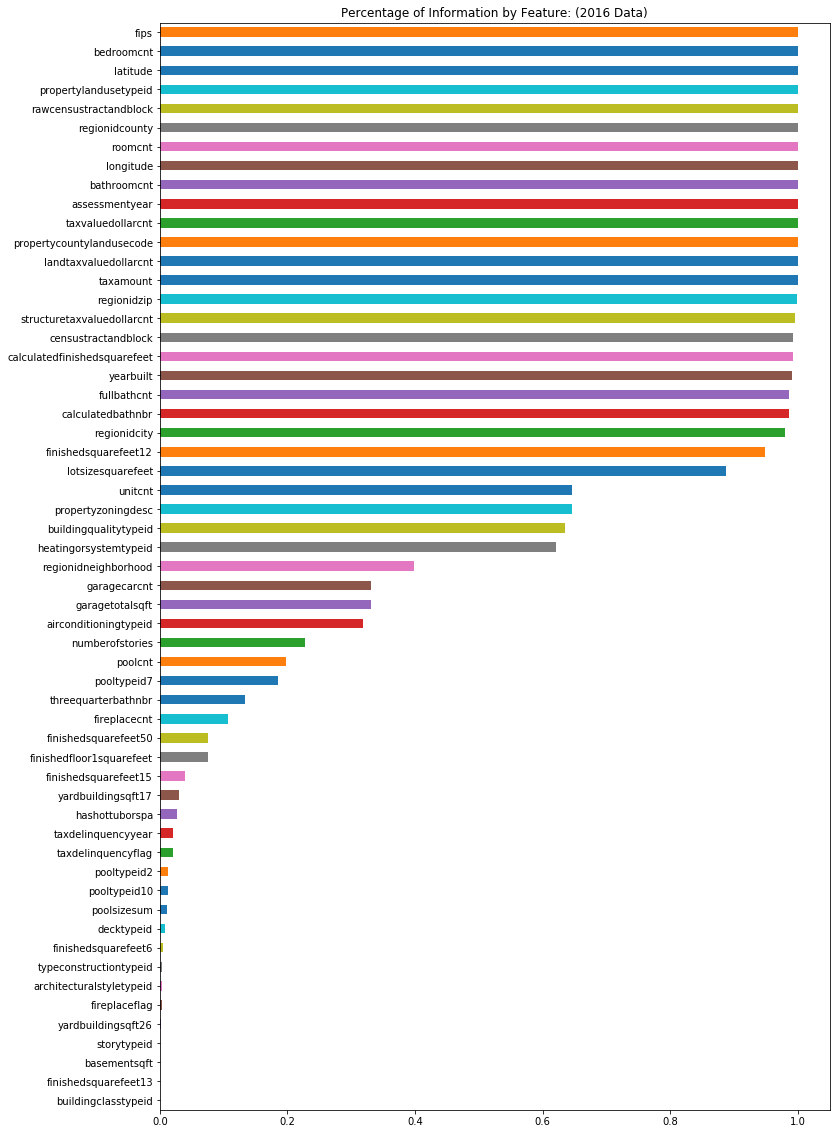

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:295: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Prepare for the prediction ...
Start prediction ...
PREDICTION
---------------------------------------
[-1.41599998e-01 -4.99999989e-03 -1.20999999e-02  2.08000001e-02
  5.92000000e-02 -2.11999994e-02 -7.58000016e-02 -3.85699987e-01
 -2.65300006e-01  6.76999986e-02  3.00000003e-03  9.61999968e-02
 -1.00000005e-03  4.99999989e-03 -3.15000005e-02  4.30999994e-02
  6.45500004e-01  2.47000009e-02  3.73000018e-02  1.84000000e-01
  1.74799994e-01 -5.22999987e-02 -1.41000003e-02  5.82999997e-02
 -4.50000018e-02  1.09800003e-01  1.09000001e-02  0.00000000e+00
  2.08000001e-02  0.00000000e+00 -2.11999994e-02 -3.15000005e-02
  3.20600003e-01  1.27499998e-01 -7.00000022e-03 -1.01999998e-01
  2.82200009e-01 -1.48499995e-01 -2.57499993e-01 -3.55999991e-02
  4.21000011e-02  1.08000003e-01 -1.92000009e-02 -2.02099994e-01
 -2.75799990e-01  6.00000005e-03  8.98000002e-02  7.01600015e-01
  7.59999976e-02  4.99999989e-03 -8.77000019e-02 -1.39300004e-01
  7.00000022e-03  4.39999998e-02 -7.90000036e-02  3.

In [65]:
##### ENVIRONMENT SETUP ########

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.stats as stats
from scipy.stats import norm
#import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor

pd.options.display.max_columns = 999

##### TRAINING DATA ############

train_data = pd.read_csv('data/train_2016_v2.csv', parse_dates =["transactiondate"])
# print train_data.shape
train_data.head(10)

##### PROPERTY DATA ############

property_data = pd.read_csv('data/2016DATA.csv')
# print property_data.shape
property_data.head(10)
# print property_data.dtypes

##### Visualize and Clean Data #####

plt.figure(figsize=(12,20))
property_data.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Percentage of Information by Feature: (2016 Data)')
plt.show()
property_data.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = False)

##### Pools & Hot tubs ##########

# "0 pools"
property_data.poolcnt.fillna(0,inplace = True)
# "0 hot tubs or spas"
property_data.hashottuborspa.fillna(0,inplace = True)
# Convert "True" to 1
property_data.hashottuborspa.replace(to_replace = True, value = 1,inplace = True)
# print property_data['hashottuborspa'].value_counts()

# Set properties that have a pool but no info on poolsize equal to the median poolsize value.
property_data.loc[property_data.poolcnt==1, 'poolsizesum'] = property_data.loc[property_data.poolcnt==1, 'poolsizesum'].fillna(property_data[property_data.poolcnt==1].poolsizesum.median())
# "0 pools" = "0 sq ft of pools"
property_data.loc[property_data.poolcnt==0, 'poolsizesum']=0
# "0 pools with a spa/hot tub"
property_data.pooltypeid2.fillna(0,inplace = True)
# "0 pools without a hot tub"
property_data.pooltypeid7.fillna(0,inplace = True)
# Drop redundant feature
property_data.drop('pooltypeid10', axis=1, inplace=True)
property_data.head()

##### Fireplace Data ##########

# print property_data['fireplaceflag'].value_counts()
# If "fireplaceflag" is "True" and "fireplacecnt" is "NaN", we will set "fireplacecnt" equal to the median value of "1".
property_data.loc[(property_data['fireplaceflag'] == True) & (property_data['fireplacecnt'].isnull()), ['fireplacecnt']] = 1
# If 'fireplacecnt' is "NaN", replace with "0"
property_data.fireplacecnt.fillna(0,inplace = True)
# If "fireplacecnt" is 1 or larger "fireplaceflag" is "NaN", we will set "fireplaceflag" to "True".
property_data.loc[(property_data['fireplacecnt'] >= 1.0) & (property_data['fireplaceflag'].isnull()), ['fireplaceflag']] = True
property_data.fireplaceflag.fillna(0,inplace = True)
# print property_data['fireplaceflag'].value_counts()
# Convert "True" to 1
property_data.fireplaceflag.replace(to_replace = True, value = 1,inplace = True)
# print property_data['fireplaceflag'].value_counts()

##### Garage Data ##########

property_data.garagecarcnt.fillna(0,inplace = True)
property_data.garagetotalsqft.fillna(0,inplace = True)

##### Tax Data Delinquency ##########

#print property_data['taxdelinquencyflag'].value_counts()
# Replace "NaN" with "0"
property_data.taxdelinquencyflag.fillna(0,inplace = True)
# Change "Y" to "1"
property_data.taxdelinquencyflag.replace(to_replace = 'Y', value = 1,inplace = True)
# print property_data['taxdelinquencyflag'].value_counts()
# Drop "taxdelinquencyyear"
property_data.drop('taxdelinquencyyear', axis=1, inplace=True)

##### The Rest ##########

# Drop "storytypeid"
property_data.drop('storytypeid', axis=1, inplace=True)
# Replace "NaN" with 0, signifying no basement.
property_data.basementsqft.fillna(0,inplace = True)
#print(property_data['yardbuildingsqft26'].value_counts())
# Replace 'yardbuildingsqft26' "NaN"s with "0".
property_data.yardbuildingsqft26.fillna(0,inplace = True)
# Drop "architecturalstyletypeid"
property_data.drop('architecturalstyletypeid', axis=1, inplace=True)
# Drop "typeconstructiontypeid" and "finishedsquarefeet13"
property_data.drop('typeconstructiontypeid', axis=1, inplace=True)
property_data.drop('finishedsquarefeet13', axis=1, inplace=True)
# Drop "buildingclasstypeid"
property_data.drop('buildingclasstypeid', axis=1, inplace=True)
#print property_data.shape
property_data.notnull().mean().sort_values(ascending = False)
# Let's check the unique values for "decktypeid"
# print(property_data['decktypeid'].value_counts())
# Change "decktypeid" "Nan"s to "0"
property_data.decktypeid.fillna(0,inplace = True)
# Convert "decktypeid" "66.0" to "1"
property_data.decktypeid.replace(to_replace = 66.0, value = 1,inplace = True)
# print(property_data['decktypeid'].value_counts())
# print(property_data['finishedsquarefeet6'].value_counts())

#squarefeet = property_data[property_data['finishedsquarefeet6'].notnull() & property_data['finishedsquarefeet12'].isnull() & property_data['finishedsquarefeet15'].isnull() & property_data['finishedsquarefeet50'].isnull() & property_data['lotsizesquarefeet'].isnull()]
#squarefeet = property_data[property_data['finishedsquarefeet12'].notnull() & property_data['finishedsquarefeet15'].notnull() & property_data['finishedsquarefeet50'].notnull() & property_data['lotsizesquarefeet'].notnull()]
squarefeet = property_data[property_data['finishedsquarefeet15'].notnull() & property_data['finishedsquarefeet50'].notnull() & property_data['lotsizesquarefeet'].notnull()]
squarefeet[['calculatedfinishedsquarefeet','finishedsquarefeet6','finishedsquarefeet12','finishedsquarefeet15','finishedsquarefeet50','numberofstories','lotsizesquarefeet','landtaxvaluedollarcnt','structuretaxvaluedollarcnt','taxvaluedollarcnt','taxamount']]
#squarefeet
# squarefeet = property_data[property_data[['finishedsquarefeet6','finishedsquarefeet12','finishedsquarefeet15','finishedsquarefeet50','lotsizesquarefeet']].notnull()]
#property_data[['finishedsquarefeet6','finishedsquarefeet12','finishedsquarefeet15','finishedsquarefeet50','lotsizesquarefeet']][:100]

# Drop "finishedsquarefeet6"
property_data.drop('finishedsquarefeet6', axis=1, inplace=True)
# Drop "finishedsquarefeet12"
property_data.drop('finishedsquarefeet12', axis=1, inplace=True)
# Drop "finishedfloor1squarefeet"
property_data.drop('finishedfloor1squarefeet', axis=1, inplace=True)

squarefeet2 = property_data[property_data['finishedsquarefeet15'].notnull() & property_data['finishedsquarefeet50'].notnull() & property_data['lotsizesquarefeet'].notnull()]
#squarefeet2 = property_data[property_data['finishedsquarefeet15'].notnull() & property_data['calculatedfinishedsquarefeet'].isnull()]
squarefeet2[['calculatedfinishedsquarefeet','finishedsquarefeet15','finishedsquarefeet50','numberofstories','lotsizesquarefeet']]
property_data.notnull().mean().sort_values(ascending = False)

# Replace "NaN" "calculatedfinishedsquarefeet" values with mean.
property_data['calculatedfinishedsquarefeet'].fillna((property_data['calculatedfinishedsquarefeet'].mean()), inplace=True)

# Replace "NaN" "finishedsquarefeet15" values with calculatedfinishedsquarefeet.
property_data.loc[property_data['finishedsquarefeet15'].isnull(),'finishedsquarefeet15'] = property_data['calculatedfinishedsquarefeet']
#property_data['finishedsquarefeet15'].fillna(property_data['calculatedfinishedsquarefeet'])

property_data.numberofstories.fillna(1,inplace = True)
property_data.notnull().mean().sort_values(ascending = False)
# print(property_data['numberofstories'].value_counts())

# If "numberofstories" is equal to "1", then we can replace the "NaN"s with the "calculatedfinishedsquarefeet" value. Fill in the rest with the average values.
property_data.loc[property_data['numberofstories'] == 1.0,'finishedsquarefeet50'] = property_data['calculatedfinishedsquarefeet']
property_data['finishedsquarefeet50'].fillna((property_data['finishedsquarefeet50'].mean()), inplace=True)

# print property_data.shape
property_data.notnull().mean().sort_values(ascending = False)

# Replace 'yardbuildingsqft17' "NaN"s with "0".
property_data.yardbuildingsqft17.fillna(0,inplace = True)

bathrooms = property_data[property_data['fullbathcnt'].notnull() & property_data['threequarterbathnbr'].notnull() & property_data['calculatedbathnbr'].notnull()]
bathrooms[['fullbathcnt','threequarterbathnbr','calculatedbathnbr']]

# Drop "threequarterbathnbr"
property_data.drop('threequarterbathnbr', axis=1, inplace=True)
# Drop "fullbathcnt"
property_data.drop('fullbathcnt', axis=1, inplace=True)
# Fill in "NaN" "calculatedbathnbr" with most common
bathroommode = property_data['calculatedbathnbr'].value_counts().idxmax()
property_data['calculatedbathnbr'] = property_data['calculatedbathnbr'].fillna(bathroommode)

# print property_data.shape
property_data.notnull().mean().sort_values(ascending = False)
property_data.airconditioningtypeid.fillna(5,inplace = True)

# Drop "regionidneighborhood"
property_data.drop('regionidneighborhood', axis=1, inplace=True)
property_data.heatingorsystemtypeid.fillna(13,inplace = True)
# print(property_data['buildingqualitytypeid'].value_counts())

# Fill in "NaN" "buildingqualitytypeid" with most common
buildingqual = property_data['buildingqualitytypeid'].value_counts().idxmax()
property_data['buildingqualitytypeid'] = property_data['buildingqualitytypeid'].fillna(buildingqual)

property_data.unitcnt.fillna(1,inplace = True)
# print(property_data['propertyzoningdesc'].value_counts())

# Fill in "NaN" "propertyzoningdesc" with most common
propertyzoningdesc = property_data['propertyzoningdesc'].value_counts().idxmax()
property_data['propertyzoningdesc'] = property_data['propertyzoningdesc'].fillna(propertyzoningdesc)
property_data['lotsizesquarefeet'].fillna((property_data['lotsizesquarefeet'].mean()), inplace=True)

# print(property_data['censustractandblock'].value_counts())
# print(property_data['rawcensustractandblock'].value_counts())

# Drop "censustractandblock"
property_data.drop('censustractandblock', axis=1, inplace=True)
property_data.landtaxvaluedollarcnt.fillna(0,inplace = True)
property_data.structuretaxvaluedollarcnt.fillna(0,inplace = True)
property_data['taxvaluedollarcnt'].fillna((property_data['taxvaluedollarcnt'].mean()), inplace=True)

property_data['taxpercentage'] = property_data['taxamount'] / property_data['taxvaluedollarcnt']
property_data.head()
property_data['taxpercentage'].fillna((property_data['taxpercentage'].mean()), inplace=True)

# Drop "taxamount"
property_data.drop('taxamount', axis=1, inplace=True)
# Drop "regionidcity"
property_data.drop('regionidcity', axis=1, inplace=True)

# Fill in "NaN" "yearbuilt" with most common
yearbuilt = property_data['yearbuilt'].value_counts().idxmax()
property_data['yearbuilt'] = property_data['yearbuilt'].fillna(yearbuilt)


#print property_data.shape
#print property_data.dtypes
property_data.notnull().mean().sort_values(ascending = False)

# Fill in "fips" "NaN"s
fips = property_data['fips'].value_counts().idxmax()
property_data['fips'] = property_data['fips'].fillna(fips)

# Fill in "propertylandusetypeid" "NaN"s
propertylandusetypeid = property_data['propertylandusetypeid'].value_counts().idxmax()
property_data['propertylandusetypeid'] = property_data['propertylandusetypeid'].fillna(propertylandusetypeid)

# Drop 'regionidcounty'
property_data.drop('regionidcounty', axis=1, inplace=True)

# Fill in "latitude" "NaN"s
latitude = property_data['latitude'].value_counts().idxmax()
property_data['latitude'] = property_data['latitude'].fillna(latitude)

# Fill in "longitude" "NaN"s
longitude = property_data['longitude'].value_counts().idxmax()
property_data['longitude'] = property_data['longitude'].fillna(longitude)


# Fill in "rawcensustractandblock" "NaN"s
rawcensustractandblock = property_data['rawcensustractandblock'].value_counts().idxmax()
property_data['rawcensustractandblock'] = property_data['rawcensustractandblock'].fillna(rawcensustractandblock)

# Fill in "assessmentyear" "NaN"s
assessmentyear = property_data['assessmentyear'].value_counts().idxmax()
property_data['assessmentyear'] = property_data['assessmentyear'].fillna(assessmentyear)

# Fill in "bedroomcnt" "NaN"s
bedroomcnt = property_data['bedroomcnt'].value_counts().idxmax()
property_data['bedroomcnt'] = property_data['bedroomcnt'].fillna(bedroomcnt)

# Fill in "bathroomcnt" "NaN"s
bathroomcnt = property_data['bathroomcnt'].value_counts().idxmax()
property_data['bathroomcnt'] = property_data['bathroomcnt'].fillna(bathroomcnt)

# Fill in "roomcnt" "NaN"s
roomcnt = property_data['roomcnt'].value_counts().idxmax()
property_data['roomcnt'] = property_data['roomcnt'].fillna(roomcnt)

# Fill in "propertycountylandusecode" "NaN"s
propertycountylandusecode = property_data['propertycountylandusecode'].value_counts().idxmax()
property_data['propertycountylandusecode'] = property_data['propertycountylandusecode'].fillna(propertycountylandusecode)

# Fill in "regionidzip " "NaN"s
regionidzip = property_data['regionidzip'].value_counts().idxmax()
property_data['regionidzip'] = property_data['regionidzip'].fillna(regionidzip)

#print property_data.shape
property_data.notnull().mean().sort_values(ascending = False)

###### LOG ERROR ###########

train_with_months = train_data
train_with_months['sale_month'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).month)
train_with_months['sale_day'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).day)
train_with_months['sale_year'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).year)
train_with_months.head(10)


######### Create New Features #########

property_data['taxpersqft'] = property_data['taxvaluedollarcnt'] / property_data['calculatedfinishedsquarefeet']
property_data['bathpersqft'] = property_data['bathroomcnt'] / property_data['calculatedfinishedsquarefeet']
property_data['roompersqft'] = property_data['roomcnt'] / property_data['calculatedfinishedsquarefeet']
property_data['bedroompersqft'] = property_data['bedroomcnt'] / property_data['calculatedfinishedsquarefeet']

######### Merge the Datasets #########

#train_data.drop(['sale_year','sale_day'],axis=1,inplace=True)
merged_data = train_data.merge(property_data,on='parcelid',how='left')
merged_data.head(5)

train_data.drop(['sale_month','sale_year','sale_day'],axis=1,inplace=True)




corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]



import gc

#print('Loading data ...')
#train = pd.read_csv('../input/train_2016.csv')
#prop = pd.read_csv('../input/properties_2016.csv')

for c, dtype in zip(merged_data.columns, merged_data.dtypes):	
    if dtype == np.float64 or dtype == np.int64:		
        merged_data[c] = merged_data[c].astype(np.float32)

#df_train = train_data.merge(property_data, how='left', on='parcelid')
df_train = merged_data


merged_data.drop(['sale_month','sale_year','sale_day'],axis=1,inplace=True)
x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
y_train = df_train['logerror'].values
#print(x_train.shape, y_train.shape)

train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

del df_train; gc.collect()

split = 90000
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]
x_train = x_train.values.astype(np.float32, copy=False)
x_valid = x_valid.values.astype(np.float32, copy=False)

#d_train = lgb.Dataset(x_train, label=y_train)
#d_valid = lgb.Dataset(x_valid, label=y_valid)

params = {}
params['learning_rate'] = 0.002
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1

'''
params = {}
params['max_bin'] = 10
params['learning_rate'] = 0.0021 # shrinkage_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'          # or 'mae'
params['sub_feature'] = 0.345    # feature_fraction (small values => use very different submodels)
params['bagging_fraction'] = 0.85 # sub_row
params['bagging_freq'] = 40
params['num_leaves'] = 512        # num_leaf
params['min_data'] = 500         # min_data_in_leaf
params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf
params['verbose'] = 0
params['feature_fraction_seed'] = 2
params['bagging_seed'] = 3
'''



print("Prepare for the prediction ...")
sample = pd.read_csv('data/sample_submission.csv')
sample['parcelid'] = sample['ParcelId']
df_test = sample.merge(property_data, on='parcelid', how='left')
del sample; gc.collect()
x_test = df_test[train_columns]
del df_test; gc.collect()
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)
x_test = x_test.values.astype(np.float32, copy=False)

print("Start prediction ...")

# Define model
propertyprice_model = DecisionTreeRegressor()
# Fit model
propertyprice_model.fit(x_train, y_train)

# get predicted prices on validation data
print("PREDICTION")
val_predictions = propertyprice_model.predict(x_valid)
print("---------------------------------------");
print(val_predictions)
print("---------------------------------------");
from sklearn.metrics import mean_absolute_error

print("MEAN ABSOLUTE ERROR")
print("---------------------------------------");

print(mean_absolute_error(y_valid, val_predictions))



#print("Start write result ...")
#sub = pd.read_csv('data/sample_submission.csv')
#for c in sub.columns[sub.columns != 'ParcelId']:
  #  sub[c] = val_predictions

#sub.to_csv('data/dectree_results.csv', index=False, float_format='%.4f')



